# A. EFFECT OF THE NUMBER OF TRAINING SAMPLES ON PERFORMANCE
In this experiment, we will evaluate the effect of proposed few-shot learning method to address the first two challenges in limited data fault diagnosis: 1) industry systems are not allowed to run into faulty states due to the consequences, especially for critical systems and failures; 2) most electromechanical failures occur slowly and follow a degradation path such that failure degradation of a system might take months or even years. We conducted a series of experiments on the training data in datasets D with 90, 120, 300, 900, 1500, 3000, 6000, 12000, 19800 samples respectively, then evaluated the effect of numbers on performance for each training model. We repeated each experiment ten times to deal with the randomness of the algorithms.

# B. PERFORMANCE UNDER NOISE ENVIRONMENT
In this experient, we will evaluate effect of the proposed few-shot learning method to address the third challenge in limited data fault diagnosis: 
working conditions of mechanical systems are very complicated and change many times from time to time according to production requirement. It is unrealistic to collect and label enough training samples. 
We discuss the performance under noise environment to simulate the change of working conditions in datasets D.
Signal-to-noise ratio (SNR) is defined as the ratio of signal power to the noise power, often expressed in decibels detailed as follows:
\begin{equation}\label{eq:SNR}
    \small
    \operatorname{SNR_{dB}} = 10\operatorname{log}_{10}(P_{signal}/P_{noise}) 
\end{equation}
where $P_{signal}$ and $P_{noise}$ are the power of the signal and the noise, respectively.
In this case, the models are trained with the original data provided by CWRU, then tested with added different SNR white Gaussian test samples. The different SNR ranges from -4 dB to 10 dB. 


# A. 训练样本数量对性能的影响
在本实验中，我们将评估所提出的少样本学习方法在解决有限数据故障诊断中的前两个挑战方面的效果：1）不允许行业系统出现故障由于后果的状态，特别是对于关键系统和故障； 2) 大多数机电故障发生缓慢并遵循退化路径，因此系统的故障退化可能需要数月甚至数年。我们对数据集 D 中的训练数据进行了一系列实验，分别有 90、120、300、900、1500、3000、6000、12000、19800 个样本，然后评估了数字对每个训练模型性能的影响。我们将每个实验重复十次以处理算法的随机性。 

# B. 噪声环境下的性能
在本次实验中，我们将评估所提出的小样本学习方法的效果，以解决有限数据故障诊断中的第三个挑战：机械系统的工作条件非常复杂，并且会根据其不时变化多次到生产要求。收集和标记足够的训练样本是不现实的。我们讨论噪声环境下的性能以模拟数据集中工作条件的变化 D. 信噪比 (SNR) 定义为信号功率与噪声功率的比值，通常以分贝表示，详细如下：SNRdB= 10log10(Psignal
其中 PsignalPsignal 和 PnoisePnoise 分别是信号和噪声的功率。 在这种情况下，模型使用 CWRU 提供的原始数据进行训练，然后添加不同的 SNR 白高斯测试样本进行测试。 不同的 SNR 范围从 -4 dB 到 10 dB。

In [1]:
%matplotlib inline
import tensorflow as tf
import tensorflow
# set the memory usage
from tensorflow.python.keras.backend import set_session

tf_config = tf.compat.v1.ConfigProto()
tf_config.gpu_options.allow_growth = True
set_session(tf.compat.v1.Session(config=tf_config))

import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import imp
import pandas as pd
import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping

# load data

In [2]:
import cwru 

window_size = 2048
data = cwru.CWRU(['12DriveEndFault'], ['1772', '1750', '1730'], window_size)
data.nclasses,data.classes,len(data.X_train),len(data.X_test)

Datasets/CWRU 12DriveEndFault 1730
idx： 0
fpath： Datasets/CWRU\NormalBaseline\1730\Normal.mat
time_series.shape: (485643, 2)
idx： 1
fpath： Datasets/CWRU\NormalBaseline\1750\Normal.mat
dict_keys(['__header__', '__version__', '__globals__', 'ans', 'X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time'])
time_series.shape: (483903, 2)
idx： 2
fpath： Datasets/CWRU\NormalBaseline\1772\Normal.mat
time_series.shape: (483903, 2)
idx： 3
fpath： Datasets/CWRU\12DriveEndFault\1730\0.007-Ball.mat
time_series.shape: (121556, 2)
idx： 4
fpath： Datasets/CWRU\12DriveEndFault\1750\0.007-Ball.mat
time_series.shape: (121556, 2)
idx： 5
fpath： Datasets/CWRU\12DriveEndFault\1772\0.007-Ball.mat
time_series.shape: (121410, 2)
idx： 6
fpath： Datasets/CWRU\12DriveEndFault\1730\0.014-Ball.mat
time_series.shape: (122136, 2)
idx： 7
fpath： Datasets/CWRU\12DriveEndFault\1750\0.014-Ball.mat
time_series.shape: (121991, 2)
idx： 8
fpath： Datasets/CWRU\12DriveEndFault\1772\0.014-Ball.mat
time_series.shape: (122136, 2

(10,
 [('NormalBaselineNormal', 0),
  ('12DriveEndFault0.007-Ball', 1),
  ('12DriveEndFault0.014-Ball', 2),
  ('12DriveEndFault0.021-Ball', 3),
  ('12DriveEndFault0.007-InnerRace', 4),
  ('12DriveEndFault0.014-InnerRace', 5),
  ('12DriveEndFault0.021-InnerRace', 6),
  ('12DriveEndFault0.007-OuterRace6', 7),
  ('12DriveEndFault0.014-OuterRace6', 8),
  ('12DriveEndFault0.021-OuterRace6', 9)],
 19800,
 750)

In [3]:
import models
# imp.reload(models)
siamese_net = models.load_siamese_net_my_mew((window_size,2))
print('\nsiamese_net summary:')
siamese_net.summary()


siamese_net summary:
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 2048, 2)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 2048, 2)]    0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 100)          137763      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model

In [4]:
print('\nsequential_3 is WDCNN:')
siamese_net.layers[2].summary()


sequential_3 is WDCNN:
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2048, 2)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 128, 16)      2064        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 16)      64          conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 16)      0           batch_normalization[0][0]        
______________________________________________________________________

In [5]:
wdcnn_net = models.load_wdcnn_net()
print('\nwdcnn_net summary:')
wdcnn_net.summary()

52806

wdcnn_net summary:
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2048, 2)]         0         
_________________________________________________________________
sequential (Sequential)      (None, 100)               51796     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 52,806
Trainable params: 52,806
Non-trainable params: 0
_________________________________________________________________


## Config

In [6]:
import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping

import siamese
imp.reload(siamese)
import utils
imp.reload(utils)

snrs = [-4,-2,0,2,4,6,8,10,None]
# snrs = [-4,0,None]

settings = {
  "N_way": 10,           # 用于测试 one-shot任务的类个数
  "batch_size": 32,
  "best": -1,
  "evaluate_every": 200,   # interval for evaluating on one-shot tasks 评估 one-shot 任务的间隔
  "loss_every": 20,      # interval for printing loss (iterations) 打印损失的间隔（迭代）
  "n_iter": 15000,
  "n_val": 2,          # how many one-shot tasks to validate on ? 有多少 one-shot 任务要验证
  "n": 0,
  "save_path":"",
  "save_weights_file": "weights-best-10-oneshot-low-data.hdf5"
}

exp_name = "EXP-AB"
# exps = [60,90,120,200,300,600,900,1500,3000,6000,12000]
exps = [1500] 
times = 10



### Training & Testing

In [7]:
# enable or disable train models. if enable training, save best models will be update.
# 启用或禁用 train model。 如果启用训练，保存的最佳模型将被更新。
is_training = True

def EXPAB_train_and_test(exp_name,exps,is_training):
    train_classes = sorted(list(set(data.y_train)))  # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    train_indices = [np.where(data.y_train == i)[0] for i in train_classes] # # 故障类型序号进行区分汇总,10个1980的列表(10, 1980),存储的是下标
    for exp in exps:  # 遍历样本数列表
        scores_1_shot = []
        scores_5_shot = []
        scores_5_shot_prod = []
        scores_wdcnn = []
        num = int(exp/len(train_classes))  # 每类样本个数
        settings['evaluate_every'] = 300 if exp<1000 else 600
        print('settings[''evaluate_every'']:', settings['evaluate_every'])
        for time_idx in range(times):  # 重复实验的次数
            seed = int(time_idx/4)*10  # 设置随机数种子
            np.random.seed(seed)
            print('random seed:',seed)
            print("\n样本数%s-第%s次训练" % (exp, time_idx) + '*' * 80)
            settings["save_path"] = "tmp/%s/size_%s/time_%s/" % (exp_name,exp,time_idx)
            data._mkdir(settings["save_path"])

            
            train_idxs = []  # 下标索引
            val_idxs = []
            for i, c in enumerate(train_classes):  # 根据故障类型进行遍历（10次）
                select_idx = train_indices[i][np.random.choice(len(train_indices[i]), num, replace=False)] # 随机从每类故障中抽取6个样本下标
                split = int(0.6*num) # 向下取整，有时候会不足60%
                train_idxs.extend(select_idx[:split]) # 每类的60%样本为训练集
                val_idxs.extend(select_idx[split:]) # 每类的40%样本为验证集
            X_train, y_train = data.X_train[train_idxs],data.y_train[train_idxs]  # 根据下标获取训练集,((30, 2048, 2), (30,))# 根据下标获取验证集,((30, 2048, 2), (30,))
            X_val, y_val = data.X_train[val_idxs],data.y_train[val_idxs]  # 根据下标获取验证集,((30, 2048, 2), (30,))
            
#             print(train_idxs[0:10])
#             print(val_idxs[0:10])
            print('len(train_idxs):',len(train_idxs))
            print('len(val_idxs):',len(val_idxs))


            # 加载 one-shot 模型并训练
            siamese_net = models.load_siamese_net_my_mew()
#             siamese_net = models.load_siamese_net_drsn()
            siamese_loader = siamese.Siamese_Loader(X_train,y_train, X_val,y_val)

            if(is_training):
                print(siamese.train_and_test_oneshot(settings,siamese_net,siamese_loader))

                
            # load wdcnn model and training
            y_train = keras.utils.to_categorical(y_train, data.nclasses)  # (30, 10)
            y_val = keras.utils.to_categorical(y_val, data.nclasses)  # (30, 10)
            y_test = keras.utils.to_categorical(data.y_test, data.nclasses)  # (750, 10)

            earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')
            # checkpoint
            # filepath="tmp/weights-best-cnn-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="%sweights-best-10-cnn-low-data.hdf5" % (settings["save_path"])
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
            callbacks_list = [earlyStopping,checkpoint]
#             siamese_net = model.load_siamese_net()
            wdcnn_net = models.load_wdcnn_net()
            if(is_training):
                    wdcnn_net.fit(X_train, y_train,
                              batch_size=32,
                              epochs=300,
                              verbose=0,
                              callbacks=callbacks_list,
                              validation_data=(X_val, y_val))
#                     siamese_net.fit(X_train, y_train,
#                               batch_size=32,
#                               epochs=300,
#                               verbose=0,
#                               callbacks=callbacks_list,
#                               validation_data=(X_val, y_val))
                    
            # loading best weights and testing 加载最好的权重并测试
            print("load best weights",settings["save_path"] + settings['save_weights_file'])
            siamese_net.load_weights(settings["save_path"] + settings['save_weights_file'])
            print("load best weights",filepath)
            wdcnn_net.load_weights(filepath)
            for snr in snrs:
                print("\n样本数%s_第%s次训练_噪音为%s" % (exp, time_idx, snr) + '*' * 80)
                X_test_noise = []
                if snr != None:
                    for x in data.X_test:
                        X_test_noise.append(utils.noise_rw(x,snr))
                    X_test_noise = np.array(X_test_noise)
                else:
                    X_test_noise = data.X_test
                
                
                # test 1_shot and 5_shot
                siamese_loader.set_val(X_test_noise,data.y_test)
                s = 'val'
                preds_5_shot = []
                prods_5_shot = []
                scores = []
                for k in range(5):  # preds:(750, 2) prods:(750, 10, 1)
                    val_acc, preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes[s]),
                                                                 len(siamese_loader.data[s]),verbose=False)
    #                 utils.confusion_plot(preds[:,1],preds[:,0])
                    print('测试集的正确率:',val_acc, 'preds.shape:',preds.shape ,'prods.shape:', prods.shape)
                    scores.append(val_acc)
                    preds_5_shot.append(preds[:,1])  # (1, 750)
                    prods_5_shot.append(prods)  # (750, 10)
                preds = []
                for line in np.array(preds_5_shot).T:
                    pass
                    preds.append(np.argmax(np.bincount(line)))
    #             utils.confusion_plot(np.array(preds),data.y_test) 
                prod_preds = np.argmax(np.sum(prods_5_shot,axis=0),axis=1).reshape(-1)

                score_5_shot = accuracy_score(data.y_test,np.array(preds))*100
                print('5_shot:',score_5_shot)
                
                score_5_shot_prod = accuracy_score(data.y_test,prod_preds)*100
                print('5_shot_prod:',score_5_shot_prod)
                
                scores_1_shot.append(scores[0])
                scores_5_shot.append(score_5_shot)
                scores_5_shot_prod.append(score_5_shot_prod)

                # test wdcnn
                score = wdcnn_net.evaluate(X_test_noise, y_test, verbose=0)[1]*100
                print('wdcnn:', score)
                scores_wdcnn.append(score)


        a =pd.DataFrame(np.array(scores_1_shot).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_1_shot.csv" % (exp_name,exp),index=True)

        a =pd.DataFrame(np.array(scores_5_shot).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_5_shot.csv" % (exp_name,exp),index=True)
        
        a =pd.DataFrame(np.array(scores_5_shot_prod).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_5_shot_prod.csv" % (exp_name,exp),index=True)

        a =pd.DataFrame(np.array(scores_wdcnn).reshape(-1,len(snrs)))
        a.columns = snrs
        a.to_csv("tmp/%s/size_%s/scores_wdcnn.csv" % (exp_name,exp),index=True)   

        
EXPAB_train_and_test(exp_name,exps,is_training)

settings[evaluate_every]: 600
random seed: 0

样本数1500-第0次训练********************************************************************************
len(train_idxs): 900
len(val_idxs): 600
Siamese_Loader的X_train的shape (900, 2048, 2)
Siamese_Loader的y_train的shape (900,)
Siamese_Loader的X_val的shape (600, 2048, 2)
Siamese_Loader的y_val的shape (600,)
{'N_way': 10, 'batch_size': 32, 'best': -1, 'evaluate_every': 600, 'loss_every': 20, 'n_iter': 15000, 'n_val': 2, 'n': 0, 'save_path': 'tmp/EXP-AB/size_1500/time_0/', 'save_weights_file': 'weights-best-10-oneshot-low-data.hdf5'}
training...

iteration 0 evaluating: 68.5
580 轮: 损失值：0.00227, 正确率:1.00000，验证集正确率99.83333::
iteration 600 evaluating: 100.0
1180 轮: 损失值：0.00605, 正确率:1.00000，验证集正确率100.00000:
iteration 1200 evaluating: 100.0
1780 轮: 损失值：0.00098, 正确率:1.00000，验证集正确率99.83333::
iteration 1800 evaluating: 100.0
2380 轮: 损失值：0.00046, 正确率:1.00000，验证集正确率100.00000:
iteration 2400 evaluating: 100.0
2980 轮: 损失值：0.00028, 正确率:1.00000，验证集正确率100.00000:
iteration 300

load best weights tmp/EXP-AB/size_1500/time_0/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_0/weights-best-10-cnn-low-data.hdf5

样本数1500_第0次训练_噪音为-4********************************************************************************
测试集的正确率: 56.4 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 56.4 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 56.4 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 56.4 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 56.4 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 56.39999999999999
5_shot_prod: 0.4
wdcnn: 30.133333802223206

样本数1500_第0次训练_噪音为-2********************************************************************************
测试集的正确率: 78.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 78.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 78.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 78.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率

测试集的正确率: 95.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 95.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 95.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 95.6
5_shot_prod: 0.0
wdcnn: 87.33333349227905

样本数1500_第0次训练_噪音为4********************************************************************************
测试集的正确率: 99.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.06666666666666
5_shot_prod: 0.0
wdcnn: 95.333331823349

样本数1500_第0次训练_噪音为6********************************************************************************
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 1

load best weights tmp/EXP-AB/size_1500/time_1/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_1/weights-best-10-cnn-low-data.hdf5

样本数1500_第1次训练_噪音为-4********************************************************************************
测试集的正确率: 48.666666666666664 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 48.666666666666664 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 48.666666666666664 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 48.666666666666664 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 48.666666666666664 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 48.66666666666667
5_shot_prod: 0.0
wdcnn: 29.199999570846558

样本数1500_第1次训练_噪音为-2********************************************************************************
测试集的正确率: 71.2 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 71.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 71.06666666666666 preds.shape: (750, 2)

测试集的正确率: 99.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.06666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.06666666666666
5_shot_prod: 0.0
wdcnn: 98.4000027179718

样本数1500_第1次训练_噪音为8********************************************************************************
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.33333333333333
5_shot_prod: 0.0
wdcnn: 98.66666793823242

样本数1500_第1次训练_噪音为10********************************************************************************
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.6 p

load best weights tmp/EXP-AB/size_1500/time_2/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_2/weights-best-10-cnn-low-data.hdf5

样本数1500_第2次训练_噪音为-4********************************************************************************
测试集的正确率: 67.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 67.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 67.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 67.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 67.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 67.33333333333333
5_shot_prod: 0.0
wdcnn: 28.66666615009308

样本数1500_第2次训练_噪音为-2********************************************************************************
测试集的正确率: 84.26666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 84.26666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 84.26666666666667 preds.shape: (

测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.46666666666667
5_shot_prod: 0.0
wdcnn: 98.4000027179718

样本数1500_第2次训练_噪音为None********************************************************************************
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.73333333333333
5_shot_prod: 0.0
wdcnn: 98.4000027179718
random seed: 0

样本数1500-第3次训练********************************************************************************
len(train_idxs): 900
len(val_idxs): 600
Siamese_Loade

load best weights tmp/EXP-AB/size_1500/time_3/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_3/weights-best-10-cnn-low-data.hdf5

样本数1500_第3次训练_噪音为-4********************************************************************************
测试集的正确率: 53.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 53.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 53.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 53.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 53.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 53.86666666666666
5_shot_prod: 0.4
wdcnn: 27.59999930858612

样本数1500_第3次训练_噪音为-2********************************************************************************
测试集的正确率: 80.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 80.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 80.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正

10780 轮: 损失值：0.00013, 正确率:1.00000，验证集正确率100.00000:
iteration 10800 evaluating: 100.0
11380 轮: 损失值：0.02886, 正确率:0.96875，验证集正确率100.00000:
iteration 11400 evaluating: 100.0
11980 轮: 损失值：0.00011, 正确率:1.00000，验证集正确率100.00000:
iteration 12000 evaluating: 100.0
12580 轮: 损失值：0.00017, 正确率:1.00000，验证集正确率100.00000:
iteration 12600 evaluating: 100.0
13780 轮: 损失值：0.00316, 正确率:1.00000，验证集正确率100.00000:
iteration 13800 evaluating: 100.0
14380 轮: 损失值：0.00012, 正确率:1.00000，验证集正确率100.00000:
iteration 14400 evaluating: 100.0
14980 轮: 损失值：0.00014, 正确率:1.00000，验证集正确率100.00000:100.0
52806


load best weights tmp/EXP-AB/size_1500/time_4/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_4/weights-best-10-cnn-low-data.hdf5

样本数1500_第4次训练_噪音为-4********************************************************************************
测试集的正确率: 45.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 45.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 45.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 45.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 45.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 45.86666666666667
5_shot_prod: 0.4
wdcnn: 26.266667246818542

样本数1500_第4次训练_噪音为-2********************************************************************************
测试集的正确率: 69.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 69.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 69.46666666666667 preds.shape: 

load best weights tmp/EXP-AB/size_1500/time_5/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_5/weights-best-10-cnn-low-data.hdf5

样本数1500_第5次训练_噪音为-4********************************************************************************
测试集的正确率: 70.8 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 70.8 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 70.8 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 70.8 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 70.8 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 70.8
5_shot_prod: 0.0
wdcnn: 52.133333683013916

样本数1500_第5次训练_噪音为-2********************************************************************************
测试集的正确率: 81.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 81.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 81.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 81.33333333333333 preds.shape: (75

测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.6
5_shot_prod: 0.0
wdcnn: 99.19999837875366

样本数1500_第5次训练_噪音为10********************************************************************************
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.73333333333333
5_shot_prod: 0.0
wdcnn: 99.06666874885559

样本数1500_第5次训练_噪音为None*********************************************************************

load best weights tmp/EXP-AB/size_1500/time_6/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_6/weights-best-10-cnn-low-data.hdf5

样本数1500_第6次训练_噪音为-4********************************************************************************
测试集的正确率: 60.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 60.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 60.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 60.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 60.0 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 60.0
5_shot_prod: 4.666666666666667
wdcnn: 51.06666684150696

样本数1500_第6次训练_噪音为-2********************************************************************************
测试集的正确率: 83.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 83.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 83.73333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 83.73333333333333 pre

4180 轮: 损失值：0.02140, 正确率:0.96875，验证集正确率99.66667::
iteration 4200 evaluating: 100.0
5380 轮: 损失值：0.00020, 正确率:1.00000，验证集正确率100.00000:
iteration 5400 evaluating: 100.0
5980 轮: 损失值：0.00043, 正确率:1.00000，验证集正确率100.00000:
iteration 6000 evaluating: 100.0
7180 轮: 损失值：0.00009, 正确率:1.00000，验证集正确率100.00000:
iteration 7200 evaluating: 100.0
7780 轮: 损失值：0.00012, 正确率:1.00000，验证集正确率100.00000:
iteration 7800 evaluating: 100.0
8980 轮: 损失值：0.00010, 正确率:1.00000，验证集正确率100.00000:
iteration 9000 evaluating: 100.0
9580 轮: 损失值：0.00313, 正确率:1.00000，验证集正确率95.50000::
iteration 9600 evaluating: 100.0
10180 轮: 损失值：0.00014, 正确率:1.00000，验证集正确率100.00000:
iteration 10200 evaluating: 100.0
10780 轮: 损失值：0.00012, 正确率:1.00000，验证集正确率100.00000:
iteration 10800 evaluating: 100.0
11980 轮: 损失值：0.00010, 正确率:1.00000，验证集正确率100.00000:
iteration 12000 evaluating: 100.0
12580 轮: 损失值：0.00112, 正确率:1.00000，验证集正确率99.83333::
iteration 12600 evaluating: 100.0
13180 轮: 损失值：0.00008, 正确率:1.00000，验证集正确率99.83333::
iteration 13200 evaluating: 

load best weights tmp/EXP-AB/size_1500/time_7/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_7/weights-best-10-cnn-low-data.hdf5

样本数1500_第7次训练_噪音为-4********************************************************************************
测试集的正确率: 64.4 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 63.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 63.6 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 63.86666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 63.333333333333336 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 63.6
5_shot_prod: 1.0666666666666667
wdcnn: 40.53333401679993

样本数1500_第7次训练_噪音为-2********************************************************************************
测试集的正确率: 80.66666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 81.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 80.8 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试

4180 轮: 损失值：0.00015, 正确率:1.00000，验证集正确率100.00000:
iteration 4200 evaluating: 100.0
4780 轮: 损失值：0.00022, 正确率:1.00000，验证集正确率100.00000:
iteration 4800 evaluating: 100.0
5380 轮: 损失值：0.00014, 正确率:1.00000，验证集正确率100.00000:
iteration 5400 evaluating: 100.0
6580 轮: 损失值：0.00006, 正确率:1.00000，验证集正确率100.00000:
iteration 6600 evaluating: 100.0
7180 轮: 损失值：0.00005, 正确率:1.00000，验证集正确率100.00000:
iteration 7200 evaluating: 100.0
7780 轮: 损失值：0.00011, 正确率:1.00000，验证集正确率99.83333::
iteration 7800 evaluating: 100.0
8380 轮: 损失值：0.00011, 正确率:1.00000，验证集正确率100.00000:
iteration 8400 evaluating: 100.0
8980 轮: 损失值：0.00006, 正确率:1.00000，验证集正确率100.00000:
iteration 9000 evaluating: 100.0
9580 轮: 损失值：0.00008, 正确率:1.00000，验证集正确率100.00000:
iteration 9600 evaluating: 100.0
10180 轮: 损失值：0.00008, 正确率:1.00000，验证集正确率99.83333::
iteration 10200 evaluating: 100.0
10780 轮: 损失值：0.00013, 正确率:1.00000，验证集正确率100.00000:
iteration 10800 evaluating: 100.0
11980 轮: 损失值：0.00291, 正确率:1.00000，验证集正确率100.00000:
iteration 12000 evaluating: 100.

测试集的正确率: 97.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 97.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 97.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 97.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 97.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 97.46666666666667
5_shot_prod: 0.0
wdcnn: 87.4666690826416

样本数1500_第8次训练_噪音为4********************************************************************************
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.33333333333333
5_shot_prod: 0.0
wdcnn: 96.5333342552185

样本数1500_第8次训练_噪

load best weights tmp/EXP-AB/size_1500/time_9/weights-best-10-oneshot-low-data.hdf5
load best weights tmp/EXP-AB/size_1500/time_9/weights-best-10-cnn-low-data.hdf5

样本数1500_第9次训练_噪音为-4********************************************************************************
测试集的正确率: 68.53333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 68.53333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 68.53333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 68.53333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 68.53333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 68.53333333333333
5_shot_prod: 0.13333333333333333
wdcnn: 36.133334040641785

样本数1500_第9次训练_噪音为-2********************************************************************************
测试集的正确率: 85.86666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 85.86666666666666 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 85.866666666666

测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.33333333333333 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.33333333333333
5_shot_prod: 0.0
wdcnn: 98.93333315849304

样本数1500_第9次训练_噪音为8********************************************************************************
测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
测试集的正确率: 99.46666666666667 preds.shape: (750, 2) prods.shape: (750, 10, 1)
5_shot: 99.46666666666667
5_shot_prod: 0.0
wdcnn: 99.06666874885559

样本数1500_第9次训练

In [8]:
np.bincount([2,2,3,3,1,4]) # import pdb; pdb.set_trace()

array([0, 1, 2, 2, 1], dtype=int64)

## Analysis

In [9]:
def EXPAB_analysis(exp_name,exps):
    scores_1_shot_all = pd.DataFrame()
    scores_5_shot_all = pd.DataFrame()
    scores_5_shot_prod_all = pd.DataFrame()
    scores_wdcnn_all = pd.DataFrame()
    for exp in exps:
        file_path = "tmp/%s/size_%s" % (exp_name,exp)
        tmp_data = pd.read_csv("%s/scores_1_shot.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_1_shot_all = pd.concat([scores_1_shot_all,tmp_data],axis=0)

        tmp_data = pd.read_csv("%s/scores_5_shot.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_5_shot_all = pd.concat([scores_5_shot_all,tmp_data],axis=0)

        tmp_data = pd.read_csv("%s/scores_5_shot_prod.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_5_shot_prod_all = pd.concat([scores_5_shot_prod_all,tmp_data],axis=0)
        
        tmp_data = pd.read_csv("%s/scores_wdcnn.csv" % (file_path), 
                               sep=',', index_col=0)
        tmp_data['exp'] = exp 
        scores_wdcnn_all = pd.concat([scores_wdcnn_all,tmp_data],axis=0)


    scores_1_shot_all.to_csv("tmp/%s/scores_1_shot_all.csv" % (exp_name), float_format='%.6f', index=True)
    scores_5_shot_all.to_csv("tmp/%s/scores_5_shot_all.csv" % (exp_name), float_format='%.6f', index=True)
    scores_5_shot_prod_all.to_csv("tmp/%s/scores_5_shot_prob_all.csv" % (exp_name), float_format='%.6f', index=True)
    scores_wdcnn_all.to_csv("tmp/%s/scores_wdcnn_all.csv" % (exp_name), float_format='%.6f', index=True)

    scores_1_shot_all['model'] = 'One-shot'
    scores_5_shot_all['model'] = 'Five-shot'
    scores_5_shot_prod_all['model'] = 'Five-shot-prob'
    scores_wdcnn_all['model'] = 'WDCNN'

    scores_all = pd.concat([scores_1_shot_all,scores_5_shot_all,scores_5_shot_prod_all,scores_wdcnn_all],axis=0)
    scores_all.to_csv("tmp/%s/scores_all.csv" % (exp_name), float_format='%.6f', index=True)   
    
    return scores_all

In [10]:
# analysis
scores_all = EXPAB_analysis(exp_name,exps)
scores_all_mean = scores_all.groupby(['model','exp']).mean()
scores_all_std = scores_all.groupby(['model','exp']).std()
scores_all_mean.to_csv("tmp/%s/scores_all_mean.csv" % (exp_name), float_format='%.2f', index=True)
scores_all_std.to_csv("tmp/%s/scores_all_std.csv" % (exp_name), float_format='%.2f', index=True)
scores_all_mean, scores_all_std

(                          -4.0       -2.0        0.0        2.0        4.0  \
 model          exp                                                           
 Five-shot      1500  60.293333  79.746667  90.986667  95.640000  98.226667   
 Five-shot-prob 1500   0.813333   0.213333   0.093333   0.053333   0.053333   
 One-shot       1500  60.373333  79.773333  90.973333  95.626667  98.226667   
 WDCNN          1500  34.906667  55.520000  76.906667  90.533333  95.906667   
 
                            6.0        8.0       10.0  Unnamed: 9  
 model          exp                                                
 Five-shot      1500  99.320000  99.560000  99.600000   99.640000  
 Five-shot-prob 1500   0.026667   0.026667   0.026667    0.026667  
 One-shot       1500  99.320000  99.560000  99.600000   99.640000  
 WDCNN          1500  97.800000  98.293334  98.026667   97.946667  ,
                          -4.0       -2.0        0.0       2.0       4.0  \
 model          exp                    

In [11]:
scores_all.shape

(40, 11)

## 90 t-SNE and confusion matrix results

In [12]:
from sklearn.metrics import accuracy_score
import keras

num = 90
train_classes = sorted(list(set(data.y_train)))
train_indices = [np.where(data.y_train == i)[0] for i in train_classes]

train_idxs = []
val_idxs = []
for i, c in enumerate(train_classes):
    select_idx = train_indices[i][np.random.choice(len(train_indices[i]), num, replace=False)]
    split = int(0.6*num)
    train_idxs.extend(select_idx[:split])
    val_idxs.extend(select_idx[split:])
X_train, y_train = data.X_train[train_idxs],data.y_train[train_idxs] 
X_val, y_val = data.X_train[val_idxs],data.y_train[val_idxs] 


siamese_loader = siamese.Siamese_Loader(X_train,
                                y_train,
                                data.X_test,
                                data.y_test)

siamese_net = models.load_siamese_net_my_mew()
wdcnn_net = models.load_wdcnn_net()
 

settings["save_path"] = "tmp/%s/size_%s/time_%s/" % (exp_name,num,0)
siamese_net.load_weights(settings["save_path"] + settings['save_weights_file'])
wdcnn_net.load_weights("%s/weights-best-10-cnn-low-data.hdf5" % (settings["save_path"]))


y_test = keras.utils.to_categorical(data.y_test, data.nclasses)  

Siamese_Loader的X_train的shape (540, 2048, 2)
Siamese_Loader的y_train的shape (540,)
Siamese_Loader的X_val的shape (750, 2048, 2)
Siamese_Loader的y_val的shape (750,)
52806


D:\programming\Anaconda3\envs\tf2.4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\programming\Anaconda3\envs\tf2.4\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


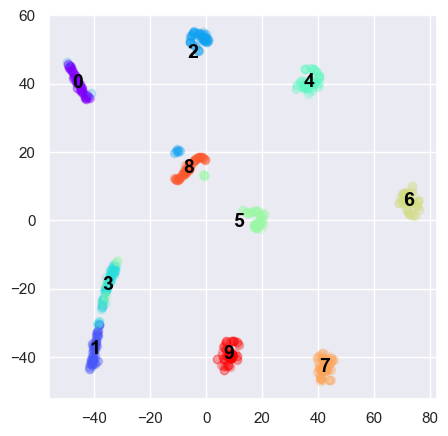

In [13]:
from keras import backend as K
import numpy as np
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')

intermediate_tensor_function = K.function([siamese_net.layers[2].layers[0].input],
                                          [siamese_net.layers[2].layers[-1].output])

plot_only = len(data.y_test)
intermediate_tensor = intermediate_tensor_function([data.X_test[0:plot_only]])[0]
# Visualization of trained flatten layer (T-SNE)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(intermediate_tensor)
p_data = pd.DataFrame(columns=['x', 'y', 'label'])
p_data.x = low_dim_embs[:, 0]
p_data.y = low_dim_embs[:, 1]
p_data.label = data.y_test[0:plot_only]
utils.plot_with_labels(p_data)
plt.savefig("%s/90-tsne-one-shot.pdf" % (settings["save_path"]))

D:\programming\Anaconda3\envs\tf2.4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\programming\Anaconda3\envs\tf2.4\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


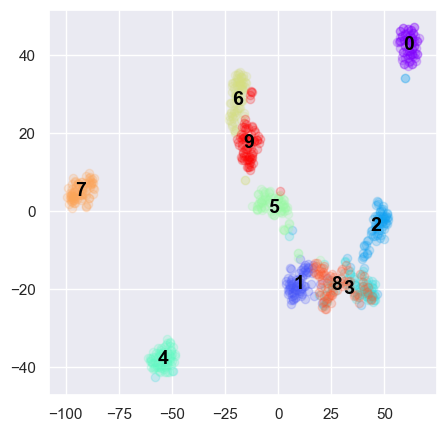

In [14]:
from keras import backend as K
import numpy as np

intermediate_tensor_function = K.function([wdcnn_net.layers[1].layers[0].input],
                                          [wdcnn_net.layers[1].layers[-1].output])
plot_only = len(data.y_test)
intermediate_tensor = intermediate_tensor_function([data.X_test[0:plot_only]])[0]
# Visualization of trained flatten layer (T-SNE)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(intermediate_tensor)
import pandas as pd
p_data = pd.DataFrame(columns=['x', 'y', 'label'])
p_data.x = low_dim_embs[:, 0]
p_data.y = low_dim_embs[:, 1]
p_data.label = data.y_test[0:plot_only]
utils.plot_with_labels(p_data)
plt.savefig("%s/90-tsne-wdcnn.pdf" % (settings["save_path"]))

In [15]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
s = 'val'
val_acc, preds, prods = siamese_loader.test_oneshot2(siamese_net,len(siamese_loader.classes[s]),len(siamese_loader.data[s]),verbose=False)
# utils.confusion_plot(preds[:,1],preds[:,0])
utils.plot_confusion_matrix(confusion_matrix(data.y_test,preds[:,1]),  normalize=False,  title=None)
plt.savefig("%s/90-cm-one-shot.pdf" % (settings["save_path"]))

Confusion matrix, without normalization
[[75  0  0  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  1  0  0  0  0]
 [ 3  0 65  1  0  0  0  0  6  0]
 [ 0  4  0 71  0  0  0  0  0  0]
 [ 0  0  0  0 75  0  0  0  0  0]
 [ 0  0  1  8  8 55  0  0  3  0]
 [ 0  0  0  0  0  0 75  0  0  0]
 [ 0  0  0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0  0  0 75]]


In [16]:
pred = np.argmax(wdcnn_net.predict(data.X_test), axis=1).reshape(-1,1)
# utils.confusion_plot(pred,data.y_test)
utils.plot_confusion_matrix(confusion_matrix(data.y_test,pred), normalize=False, title=None)
plt.savefig("%s/90-cm-wdcnn.pdf" % (settings["save_path"]))

Confusion matrix, without normalization
[[75  0  0  0  0  0  0  0  0  0]
 [ 0 63  0  0  0  0  0  0 12  0]
 [ 5  0 45 17  0  0  0  0  8  0]
 [ 0  0  3 53  2  0  0  0 17  0]
 [ 0  1  0  0 72  0  0  2  0  0]
 [ 0 13 11  0  0 36  4  0  0 11]
 [ 0  0  0  0  3  0 67  0  0  5]
 [ 0  0  0  0  0  0  0 75  0  0]
 [ 0 13  3 20  0  0  0  0 39  0]
 [ 0  0  0  0  0  3 12  0  0 60]]
